In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import streamlit as st 


In [2]:
sns.set(style="whitegrid")
%matplotlib inline

### 1 . EDA of the  dataset

In [3]:
df = pd.read_csv('E:/ExcelR/Assignments/Assignment 8 Logestic Regression/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

This is the famous the famous **Pima Indians Diabetes dataset**, Even though there are no null values at the first sight , but all the null values are replaced with '0' zero , which will cause a problem in our model's accurecy 


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


All the variables are neumarical , so no need of encoding 

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As we can see we have the following potential problems in our data set :
- **Missing Values Imputed as 0s:**
   - the variables "Glucose" , "BloodPressure" ,"SkinThickness" , "Insulin" and "BMI" have min values as 0.00 which is logically impossible.
- **Skewness and Outliers :**
   - Pregnancies: max is $17.00$. This is much higher than the 75% value of $6.00$, indicating significant right-sided outliers.
   - Insulin: The max is $846.00$. The 75% value is only $127.25$. This massive jump is a clear sign of extreme outliers.
   - DiabetesPedigreeFunction: mean ($0.47$) is significantly higher than the median ($0.37$). This indicates the data is right-skewed (has a long tail of higher values).
- **Imbalenced Data:**
   - Our Target Variable is a binary target variable and **Outcome** has a mean of 0.3489 , which means about 34.9% of the patients in the dataset have diabetes. This Indicates Imbalanced data

### Visualization 

##### 1. Histogram of features

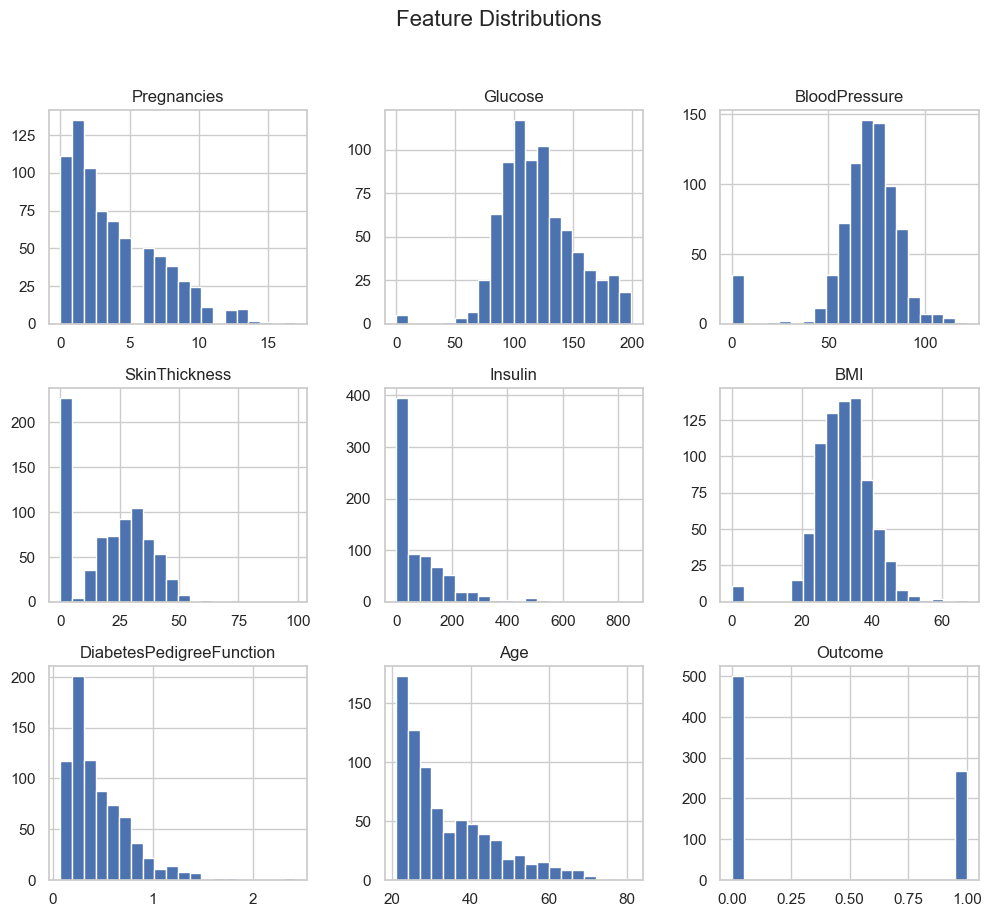

In [7]:
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show() 

We can confirm the right skewness of the variables "Pregnancies" ,"Insulin","DiabetesPedigreeFunction" indicating Extreme values.


##### 2. Correlation Heatmap

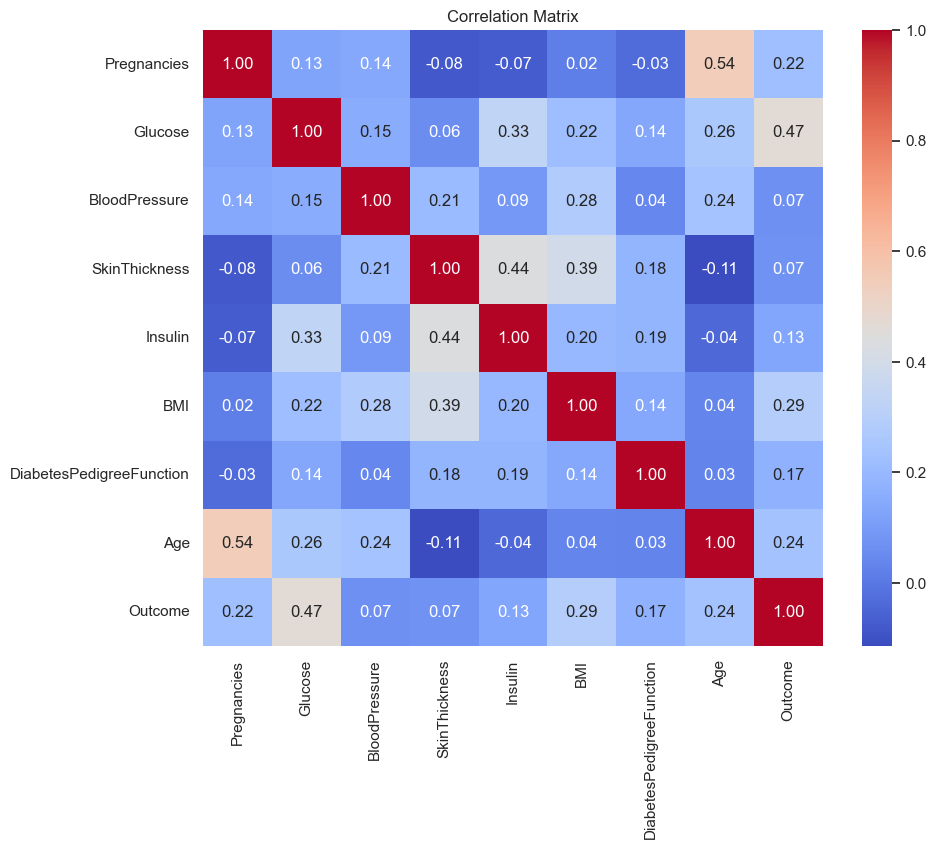

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

By first look of the correlation heat map , we can conclude the dependency as follows:
- Glucose ($0.47$) is a strong predector,
- BIm($0.29$) ,Age ($0.24$) ,Pregnancies($0.22$) also play a significant role as well.
- and rest of the variable are considered as weak relationship.

Multy colinearity:
- SkinThickness and Insulin (0.44) ->> makes sence ,cause insulin affects skin fat deposition.
- Age and Pregnancies ($0.54$) ->> Older patients naturally tend to have a higher number of pregnancies.
- 
- SkinThickness and BMI (0.39)->> Thickness of skin fold is related to body mass index.
none of the Multy colinearity is above + or - 0.7 , will not cause an issue in our case. 

#### Pairplot over Outcome

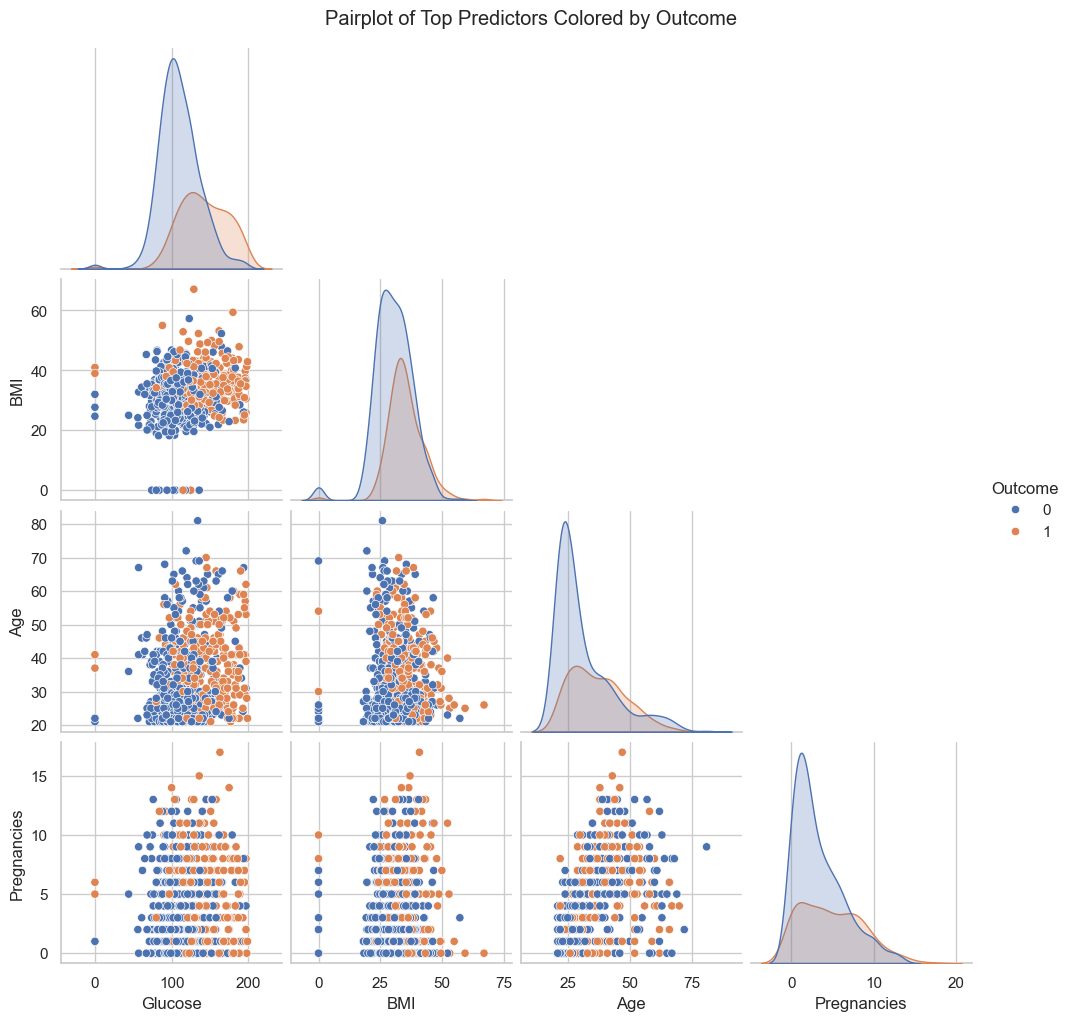

In [9]:
selected_cols = ['Glucose', 'BMI', 'Age', 'Pregnancies']
sns.pairplot(
    data=df,
    vars=selected_cols,  
    hue='Outcome',      
    corner=True          
)

plt.suptitle('Pairplot of Top Predictors Colored by Outcome', y=1.02)
plt.show()

### Data Preprocessing

#### Handling Missing Values
- replacing imputed null values

In [10]:
# List of columns where 0 represents a missing value
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] 
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)

In [11]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Replacing the null values with median values.

In [12]:
for col in cols_with_missing:
    df[col].fillna(df[col].median(), inplace=True)

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Not Mandatory for logestic Reg model

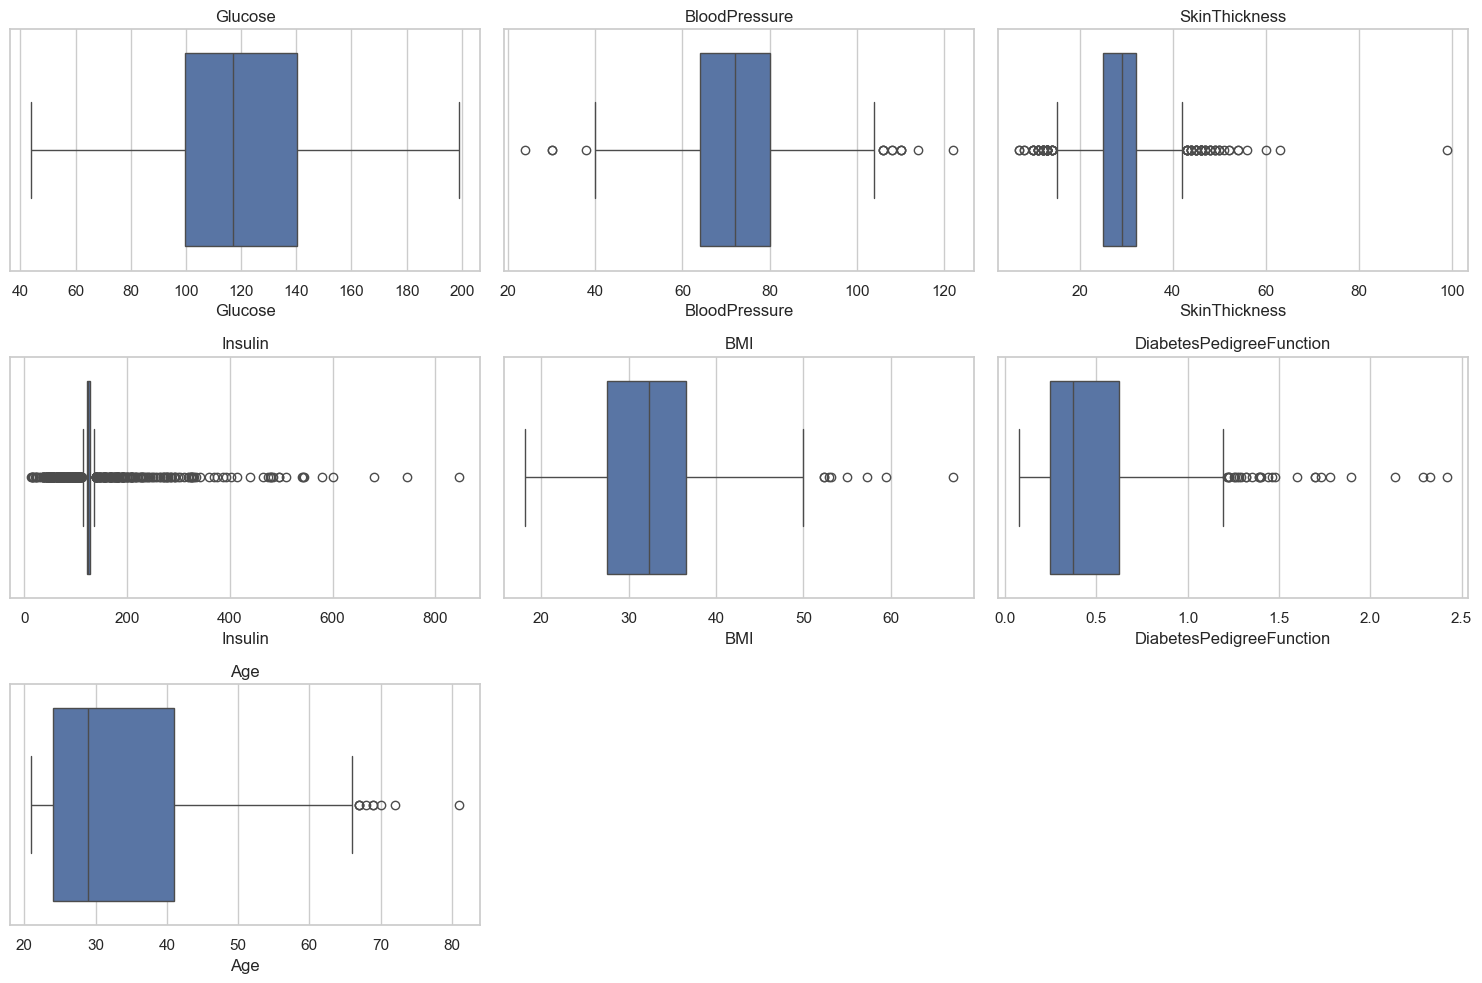

In [14]:

# plt.figure(figsize=(15, 10))
# for i, col in enumerate(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
#     plt.subplot(3, 3, i+1)
#     sns.boxplot(x=df[col])
#     plt.title(col)
# plt.tight_layout()
# plt.show()

In [41]:

def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    
 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
  
    series = series.apply(lambda x: lower_bound if x < lower_bound else x)
    series = series.apply(lambda x: upper_bound if x > upper_bound else x)
    return series


cols_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in cols_to_clean:
    df[col] = cap_outliers(df[col])

print("Outliers capped using IQR method.")
display(df.describe()) # Check max values to see the reduction

Outliers capped using IQR method.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.358073,28.866536,124.691081,32.393359,0.458914,33.199870,0.348958
std,3.369578,30.438286,11.697097,7.442353,7.913595,6.667471,0.285596,11.628404,0.476951
min,0.000000,44.000000,40.000000,14.500000,112.875000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,104.000000,42.500000,135.875000,50.250000,1.200000,66.500000,1.000000


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape , X_test.shape,y_train.shape , y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler  = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Building and training the model

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Model Evaluation

In [23]:
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix


In [25]:
metrics_summary = f"""
================================
Classification Metrics Summary
================================
Accuracy:    {accuracy_score(y_test, y_pred):.4f}
Precision:   {precision_score(y_test, y_pred):.4f}
Recall:      {recall_score(y_test, y_pred):.4f}
F1 Score:    {f1_score(y_test, y_pred):.4f}
ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}
================================
"""

print(metrics_summary)


Classification Metrics Summary
Accuracy:    0.7532
Precision:   0.6667
Recall:      0.6182
F1 Score:    0.6415
ROC-AUC Score: 0.8228



| **Metric** | **Your Score** | **What it Measures** | **Interpretation** |
| --- | --- | --- | --- |
| **Accuracy** | **0.7468** (74.68%) | The proportion of total predictions that were correct (both positive and negative). | The model correctly predicts the `Outcome` (diabetic or not) about **75% of the time**. |
| **Precision** | **0.6481** (64.81%) | Out of all patients the model **predicted** were diabetic, how many actually were? | When your model flags someone as diabetic, it is correct **64.8% of the time**. |
| **Recall** | **0.6364** (63.64%) | Out of all patients that **actually** have diabetes, how many did the model correctly find? | The model successfully finds **63.6%** of all true diabetic patients in the test set. |
| **F1 Score** | **0.6422** | The harmonic mean of Precision and Recall. | This is a single, balanced score for the model's performance on the positive class. |
| **ROC-AUC** | **0.8270** | The overall ability of the model to distinguish between positive (diabetic) and negative (non-diabetic) classes. | The model has an **82.7% chance** of correctly ranking a randomly chosen diabetic patient higher than a randomly chosen non-diabetic patient. |

### Applying Oversampling (SMOTE) 

since our dataset was modrately balance we are applying oversampling technique 

In [42]:
df2 = df.copy()

In [43]:
X = df2.drop('Outcome', axis=1)
y = df2['Outcome']

In [34]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [44]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"Original dataset shape: {Counter(y)}")
print(f"Resampled dataset shape: {Counter(y_resampled)}")

Original dataset shape: Counter({0: 500, 1: 268})
Resampled dataset shape: Counter({1: 500, 0: 500})


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train.shape , X_test.shape,y_train.shape , y_test.shape

((800, 8), (200, 8), (800,), (200,))

In [46]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [48]:
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

In [49]:
metrics_summary = f"""
================================
Classification Metrics Summary
================================
Accuracy:    {accuracy_score(y_test, y_pred):.4f}
Precision:   {precision_score(y_test, y_pred):.4f}
Recall:      {recall_score(y_test, y_pred):.4f}
F1 Score:    {f1_score(y_test, y_pred):.4f}
ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}
================================
"""

print(metrics_summary)


Classification Metrics Summary
Accuracy:    0.7650
Precision:   0.7500
Recall:      0.8020
F1 Score:    0.7751
ROC-AUC Score: 0.8339



After OverSampling of the Data we can see significant changes in our Metrics Summary , 
-  Massive Improvement in Recall (+26.0%)
-  Strong Improvement in Precision (+15.7%)
-  Excellent Balanced Performance (F1 Score +20.7%)
-  Overall Model Quality Confirmed (ROC-AUC)

### Visualizing ROC Curve

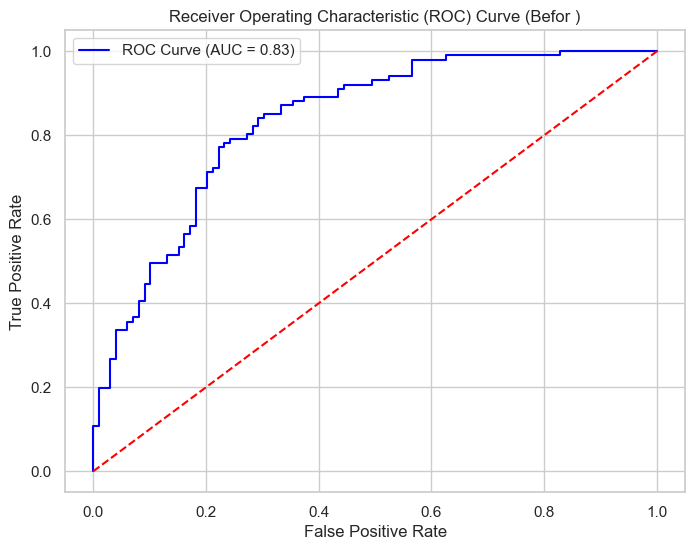

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Befor )')
plt.legend()
plt.show()

Our plot shows AUC = 0.83.A value of $0.83$ means there is an 83% chance that the model will rank a randomly chosen positive instance (diabetic patient) higher than a randomly chosen negative instance (non-diabetic patient).

In [51]:
coef_df = pd.DataFrame({
    'Feature': X_resampled.columns,
    'Coefficient': log_reg.coef_[0]
})

coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

C:\Users\Zafar\AppData\Local\Temp\ipykernel_12736\1229529061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')


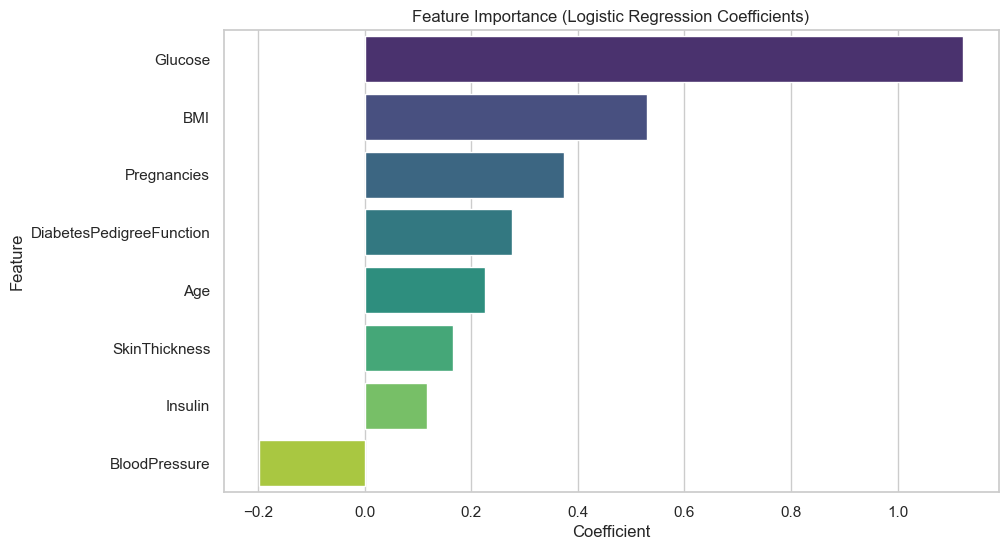

Interpretation:
                    Feature  Coefficient
1                   Glucose     1.123221
5                       BMI     0.530742
0               Pregnancies     0.374484
6  DiabetesPedigreeFunction     0.276703
7                       Age     0.225524
3             SkinThickness     0.166704
4                   Insulin     0.116368
2             BloodPressure    -0.198683


In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()

print("Interpretation:")
print(coef_df)

**Positive Coefficients :-**
- All features from Glucose down to Insulin have positive coefficients. This means an increase in these features is associated with a **higher probability** (increased log-odds) of a positive diabetes diagnosis.

**Negative Coefficient (Decreases Risk):**
- A one-unit increase in BloodPressure is associated with a lower probability (decreased log-odds) of a **positive diabetes** diagnosis.

The model is highly interpretable and its findings are clinically aligned with known risk factors for Type 2 diabetes: Glucose, BMI, Pregnancies, and Age are the primary drivers of the prediction.

### Deployment with Streamlit

In [54]:
import pickle
pickle.dump(log_reg, open('model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

We used the Python built-in library pickle to serialize (save) our trained objects.Pickling is the process of converting a Python object (like your trained LogisticRegression model or StandardScaler object) into a byte stream. This byte stream can then be saved to a file (.pkl).


- It allows us to persist the model after training. Instead of retraining the model every time the application runs, the Streamlit app can simply unpickle (load) the byte stream back into a usable Python object, saving significant time and resources.

**What we saved:**

- model.pkl: The trained Logistic Regression classifier with all its learned coefficients.
- scaler.pkl: The fitted StandardScaler object, which holds the mean and standard deviation of every feature from the training data. This is crucial for correctly preprocessing new patient inputs in the deployed application.

### Model Serialization and Streamlit Deployment Guide

To experience the interactive prediction application, follow these simple steps.

**Prerequisites**
You must have Python installed.

Install Required Libraries: Open your terminal or command prompt and install the necessary dependencies:

Open your terminal or command prompt and install the necessary dependencies:
    ```bash
    pip install streamlit pandas numpy scikit-learn plotly
    ```

In [ ]:
#pip install streamlit pandas numpy scikit-learn plotly

**Ensure File Structure:**
Verify that the following four files are present in the same directory:

Verify that the following four files are present in the same directory:
-    `app.py`
-    `model.pkl`
-    `scaler.pkl`
-    `diabetes.csv` 

**Run the Application:**

In the same terminal window, execute the Streamlit application file:

```bash
    streamlit run app.py
```

A web browser tab will automatically open, displaying the **HealthGuard Analysis System**. You can then adjust the patient's metrics in the sidebar and observe the real-time prediction and the comparative Radar Chart.

***
(Visual Guide: The deployed Streamlit app will show a professional dashboard with a risk gauge and a radar chart visualization.)

### Interview Question Solutions

##### 1. What is the difference between precision and recall?

- **Precision:** Out of all the patients the model predicted as having diabetes, how many actually had it? It measures the accuracy of positive predictions.
$$Precision = \frac{True Positives}{True Positives + False Positives}$$
- **Recall (Sensitivity):** Out of all the patients who actually have diabetes, how many did the model correctly identify? It measures the ability to find all positive cases.
$$Recall = \frac{True Positives}{True Positives + False Negatives}$$
- **Analogy:** Precision is about "quality" (not crying wolf), Recall is about "quantity" (not missing any wolves).


##### 2. What is cross-validation, and why is it important in binary classification?

- **Cross-Validation:** A technique where the dataset is split into multiple subsets (folds). The model is trained on some folds and tested on the remaining one, repeating the process multiple times.
- **Importance:** It ensures the model is robust and not just "lucky" with one specific train-test split. It gives a more reliable estimate of the model's performance on unseen data, preventing overfitting.